In [1]:
import pandas as pd
import numpy as np

In [2]:
cols = ['Side', 'Region', 'Year', 'Game ID', 'Team', 'Victory', 'Game Duration',
       'Player', 'Role', 'Kills', 'Deaths', 'Assists', 'KDA', 'CS',
       "CS in Team's Jungle", 'CSM', 'Golds', 'GPM', 'GOLD%', 'Vision Score',
       'Wards placed', 'Wards destroyed', 'Control Wards Purchased', 'VSPM',
       'WPM', 'VWPM', 'WCPM', 'VS%', 'Total damage to Champion',
       'Physical Damage', 'Magic Damage', 'True Damage', 'DPM', 'DMG%',
       'K+A Per Minute', 'KP%', 'Solo kills', 'Double kills', 'Triple kills',
       'Quadra kills', 'Penta kills', 'GD@15', 'CSD@15', 'XPD@15', 'LVLD@15',
       'Damage dealt to turrets', 'Total heal', 'Time ccing others',
       'Total damage taken']

In [3]:
df = pd.read_csv('../data/clean_game_data.csv', index_col=0)

agreession_time_link = ['Kills', 'Deaths', 'Assists', 'KDA', 'Physical Damage', 'Magic Damage', 'True Damage', 'Total damage to Champion', 'Total damage taken', 'Total heal', 'Time ccing others', 'Damage dealt to turrets']
agression_df = df[['Kills', 'Deaths', 'Assists', 'KDA', 'Solo kills', 'Double kills', 'Triple kills', 'Quadra kills', 'Penta kills', 'KP%', 'Physical Damage', 'Magic Damage', 'True Damage', 'DPM', 'DMG%', 'Total damage to Champion', 'Total damage taken', 'Total heal', 'Time ccing others', 'Damage dealt to turrets']].copy()
agression_df[agreession_time_link] = agression_df[agreession_time_link].div(df['Game Duration'], axis=0)

setup_time_link = ['Vision Score', 'Wards placed', 'Wards destroyed', 'Control Wards Purchased', 'Assists']
setup_df = df[['Time ccing others', 'Assists', 'Vision Score', 'Wards placed', 'Wards destroyed', 'Control Wards Purchased', 'VSPM', 'WPM', 'VWPM', 'WCPM', 'VS%']].copy()
setup_df[setup_time_link] = setup_df[setup_time_link].div(df['Game Duration'], axis=0)

economy_time_link = ['CS', "CS in Team's Jungle", 'Golds']
economy_df = df[['CS', "CS in Team's Jungle", 'Golds']].copy()
economy_df[economy_time_link] = economy_df[economy_time_link].div(df['Game Duration'], axis=0)

early_game_df = df[['GD@15', 'CSD@15', 'XPD@15', 'LVLD@15']]


In [4]:
from sklearn.preprocessing import StandardScaler

agressionScaler = StandardScaler()
setupScaler = StandardScaler()
economyScaler = StandardScaler()
early_gameScaler = StandardScaler()

agression_vector = agression_df.values
setup_vector = setup_df.values
economy_vector = economy_df.values
early_game_vector = early_game_df.values

agression_scaled = agressionScaler.fit_transform(agression_vector)
setup_scaled = setupScaler.fit_transform(setup_vector)
economy_scaled = economyScaler.fit_transform(economy_vector)
early_game_scaled = early_gameScaler.fit_transform(early_game_vector)


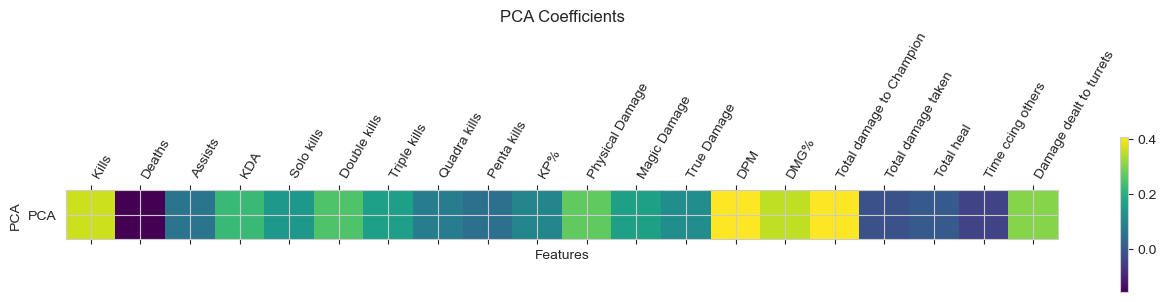

Most aggressive player: Caps with a score of 3.8040710765907884 in game 24666
Least aggressive player: Ceos with a score of -1.2587635789048646 in game 48999
Side                        Blue Side
Region                            MSI
Year                             2023
Game ID                         48999
Team                             LOUD
Victory                         False
Game Duration                  28.283
Player                           Ceos
Role                          SUPPORT
Kills                               0
Deaths                              9
Assists                             3
KDA                               0.3
CS                                 31
CS in Team's Jungle                 0
CSM                               1.1
Golds                            5866
GPM                               207
GOLD%                           0.124
Vision Score                       61
Wards placed                       40
Wards destroyed                     5
Contro

In [5]:
# PCA for agression to deduce the most important features to get weights for the weighted score calculation

from sklearn.decomposition import PCA

pca = PCA(n_components=1)
agression_pca = pca.fit_transform(agression_scaled)

# Plotting cooefficients with the original features

import matplotlib.pyplot as plt

plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0], ['PCA'])
plt.colorbar()
plt.xticks(range(len(agression_df.columns)), agression_df.columns, rotation=60, ha='left')
plt.xlabel('Features')
plt.ylabel('PCA')
plt.title('PCA Coefficients')
plt.show()

weights = pca.components_[0]
weights = weights / np.sum(weights)

# Calculating the weighted score for each player

agressionWeights = weights

agression_score = np.dot(agression_scaled, agressionWeights)
argmax = np.argmax(agression_score)
print(f"Most aggressive player: {df.iloc[argmax]['Player']} with a score of {agression_score[argmax]} in game {df.iloc[argmax]['Game ID']}")
argmin = np.argmin(agression_score)
print(f"Least aggressive player: {df.iloc[argmin]['Player']} with a score of {agression_score[argmin]} in game {df.iloc[argmin]['Game ID']}")

# printing stats and name for the player with the lowest score
print(df.iloc[argmin])



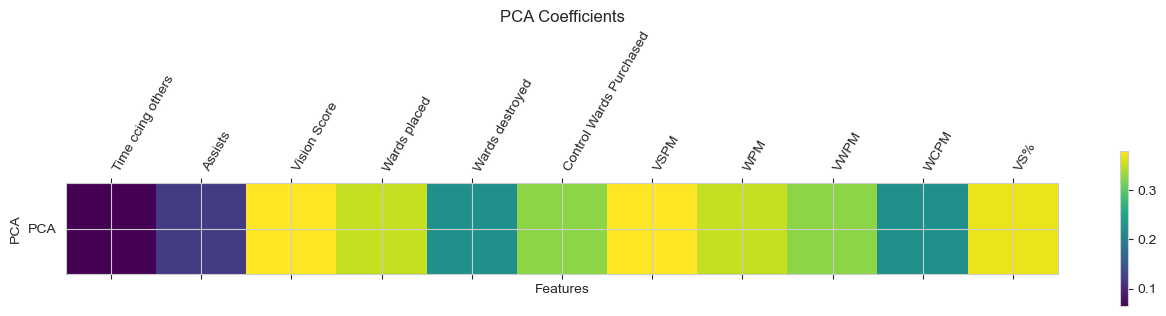

Most setup player: Rich with a score of 6.7363292128215155 in game 32215
Least setup player: Serin with a score of 0.13082142383706435 in game 44304
Teddy
2.0494700088768676
Time ccing others          22.000000
Assists                     0.142314
Vision Score                3.700172
Wards placed                2.234335
Wards destroyed             0.711572
Control Wards Purchased     0.142314
VSPM                        3.700000
WPM                         2.230000
VWPM                        0.140000
WCPM                        0.710000
VS%                         0.387000
Name: 4, dtype: float64
Time ccing others          288.000000
Assists                      0.085389
Vision Score                 2.020863
Wards placed                 0.483869
Wards destroyed              0.441174
Control Wards Purchased      0.099620
VSPM                         2.020000
WPM                          0.480000
VWPM                         0.100000
WCPM                         0.440000
VS%            

In [6]:
# PCA for setup to deduce the most important features to get weights for the weighted score calculation

pca = PCA(n_components=1)
setup_pca = pca.fit_transform(setup_scaled)

# Plotting cooefficients with the original features

plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0], ['PCA'])
plt.colorbar()
plt.xticks(range(len(setup_df.columns)), setup_df.columns, rotation=60, ha='left')
plt.xlabel('Features')
plt.ylabel('PCA')
plt.title('PCA Coefficients')
plt.show()

weights = pca.components_[0]

weights = weights / np.sum(weights)

setupWeights = weights

# Calculating the weighted score for each player

setup_score = np.dot(setup_df, setupWeights)
argmax = np.argmax(setup_score)
print(f"Most setup player: {df.iloc[argmax]['Player']} with a score of {setup_score[argmax]} in game {df.iloc[argmax]['Game ID']}")
argmin = np.argmin(setup_score)
print(f"Least setup player: {df.iloc[argmin]['Player']} with a score of {setup_score[argmin]} in game {df.iloc[argmin]['Game ID']}")

print(df.iloc[argmax-1]['Player'])
print(setup_score[argmax-1])
print(setup_df.iloc[argmax-1])
print(setup_df.iloc[argmax])

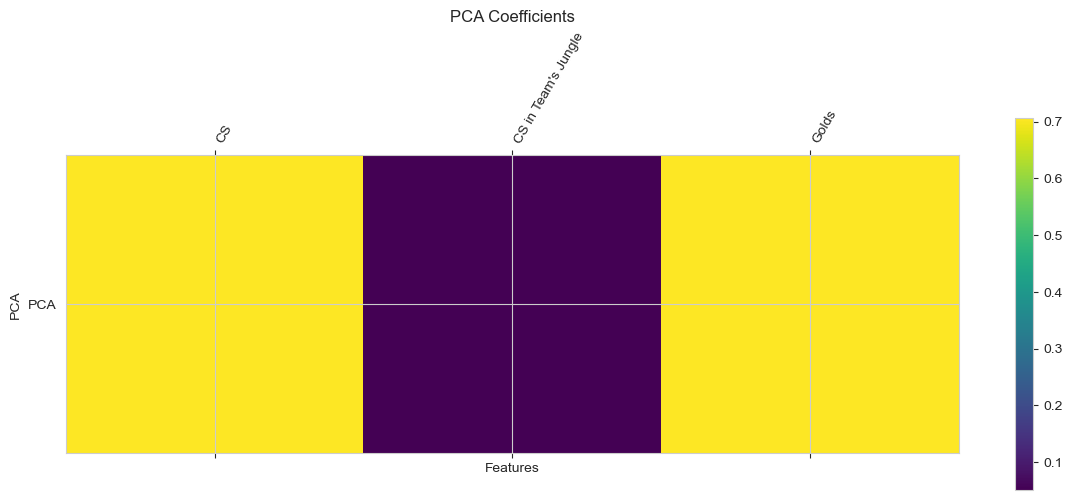

PCA Coefficients: [0.48230013 0.03489134 0.48280853]
Most economic player: Prince with a score of 2.6320865193217715 in game 41577
Least economic player: Aphromoo with a score of -2.019290595273191 in game 25322
Prince
2.6320865193217715
CS                      12.682105
CS in Team's Jungle      2.247462
Golds                  658.546374
Name: 3, dtype: float64


In [7]:
# PCA for economy to deduce the most important features to get weights for the weighted score calculation

pca = PCA(n_components=1)
economy_pca = pca.fit_transform(economy_scaled)

# Plotting cooefficients with the original features

plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0], ['PCA'])
plt.colorbar()
plt.xticks(range(len(economy_df.columns)), economy_df.columns, rotation=60, ha='left')
plt.xlabel('Features')
plt.ylabel('PCA')
plt.title('PCA Coefficients')
plt.show()

weights = pca.components_[0]
weights = weights / np.sum(weights)
print(f"PCA Coefficients: {weights}")

# Calculating the weighted score for each player

economyWeights = weights

economy_score = np.dot(economy_scaled, economyWeights)
argmax = np.argmax(economy_score)
print(f"Most economic player: {df.iloc[argmax]['Player']} with a score of {economy_score[argmax]} in game {df.iloc[argmax]['Game ID']}")
argmin = np.argmin(economy_score)
print(f"Least economic player: {df.iloc[argmin]['Player']} with a score of {economy_score[argmin]} in game {df.iloc[argmin]['Game ID']}")

print(df.iloc[argmax]['Player'])
print(economy_score[argmax])
print(economy_df.iloc[argmax])


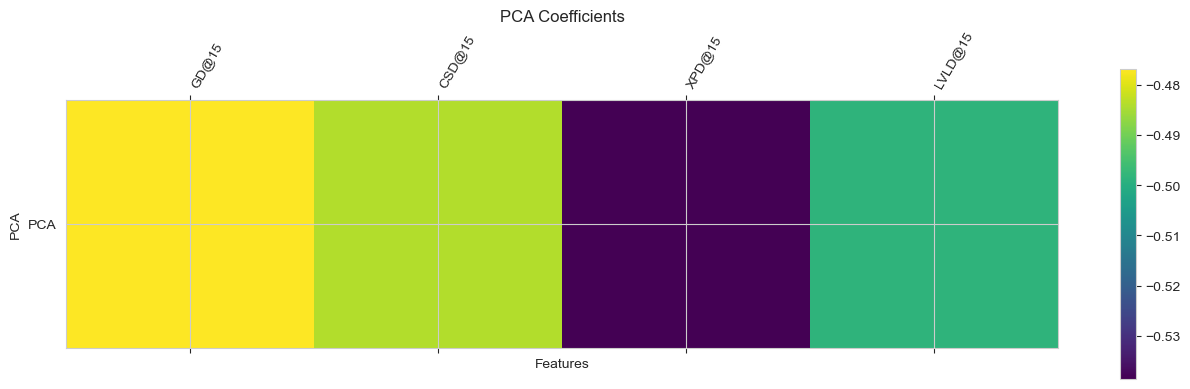

PCA Coefficients: [0.23868074 0.2422143  0.26963035 0.24947461]
Most early game player: Revenge with a score of 5.762757489903094 in game 37465
Least early game player: Huni with a score of -5.762757489903094 in game 37465
Huni
-5.762757489903094
GD@15     -4570
CSD@15     -111
XPD@15    -4195
LVLD@15      -4
Name: 0, dtype: int64


In [8]:
# PCA for early game to deduce the most important features to get weights for the weighted score calculation

pca = PCA(n_components=1)
early_game_pca = pca.fit_transform(early_game_scaled)

# Plotting cooefficients with the original features

plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0], ['PCA'])
plt.colorbar()
plt.xticks(range(len(early_game_df.columns)), early_game_df.columns, rotation=60, ha='left')
plt.xlabel('Features')
plt.ylabel('PCA')
plt.title('PCA Coefficients')
plt.show()

earlyWeights = pca.components_[0]
earlyWeights = earlyWeights / np.sum(earlyWeights)
print(f"PCA Coefficients: {earlyWeights}")

# Calculating the weighted score for each player

early_game_score = np.dot(early_game_scaled, earlyWeights)
argmax = np.argmax(early_game_score)
print(f"Most early game player: {df.iloc[argmax]['Player']} with a score of {early_game_score[argmax]} in game {df.iloc[argmax]['Game ID']}")
argmin = np.argmin(early_game_score)
print(f"Least early game player: {df.iloc[argmin]['Player']} with a score of {early_game_score[argmin]} in game {df.iloc[argmin]['Game ID']}")
print(df.iloc[argmin]['Player'])
print(early_game_score[argmin])
print(early_game_df.iloc[argmin])



In [9]:
def get_weighted_score(vector, weights, scaler, min_vector, max_vector):
    # check if scaler is fitted
    if scaler.mean_ is None or scaler.var_ is None:
        raise ValueError('Scaler is not fitted')

    scaled = scaler.transform(vector)
    scaled = np.array(scaled)
    min_scaled = scaler.transform(min_vector.reshape(1, -1))
    max_scaled = scaler.transform(max_vector.reshape(1, -1))
    min_score = np.dot(min_scaled, weights)
    max_score = np.dot(max_scaled, weights)
    score = np.dot(scaled, weights)
    if score == min_score:
        return 0
    if score == max_score:
        return 1
    
    score = (score - min_score) / (max_score - min_score)
    return score[0] # return the score as a scalar


# setting min and max vectors for the economy score (all to 0) for min

min_economy = economy_df.min() * 0
min_economy = min_economy.values
max_economy = economy_df.max()
max_economy['Golds'] = 800 # Setting to 800GPM as the max gold per minute (beyond is seen as the same)
max_economy['CS'] = 14 # Setting to 14CS per minute (beyond is seen as the same)
max_economy["CS in Team's Jungle"] = 10 # Setting to 10CS per minute (beyond is seen as the same)
max_economy = max_economy.values
print("Max economy")
#print(max_economy)
print("\n")

# setting min and max vectors for the setup score (all to 0) for min

min_setup = setup_df.min() * 0
min_setup = min_setup.values
max_setup = setup_df.max()
print("Max setup")
#print(max_setup)
print("\n")
max_setup['Time ccing others'] = 200
max_setup['Assists'] = 1
max_setup['Vision Score'] = 5
max_setup['Wards placed'] = 3
max_setup['Wards destroyed'] = 1.2
max_setup['Control Wards Purchased'] = 1
max_setup['VSPM'] = 6
max_setup['WPM'] = 1
max_setup['VWPM'] = 1
max_setup['WCPM'] = 1
max_setup['VS%'] = 0.6
max_setup = max_setup.values

# setting min and max vectors for the agression score (all to 0) for min

min_agression = agression_df.min() * 0
min_agression['Deaths'] = 0.25 # dies every 4 minutes
min_agression = min_agression.values
max_agression = agression_df.max()
print("Max agression")
#print(max_agression)
print("\n")
max_agression['Kills'] = 0.6
max_agression['Deaths'] = 0
max_agression['Assists'] = 1
max_agression['KDA'] = 0.8
max_agression['Solo kills'] = 0.05 # 1 every 20 minutes (which means 2 solo kills in a 40 minutes game, very dominant)
max_agression['Double kills'] = 0.07 # 1 every 14 minutes
max_agression['Triple kills'] = 0.02 # 1 every 50 minutes
max_agression['Quadra kills'] = 0.01 # 1 every 100 minutes
max_agression['Penta kills'] = 0.005 # 1 every 200 minutes
max_agression['KP%'] = 0.7
max_agression['Physical Damage'] = 1500
max_agression['Magic Damage'] = 1500
max_agression['True Damage'] = 500
max_agression['DPM'] = 1500
max_agression['DMG%'] = 0.7
max_agression['Total damage to Champion'] = 1500
max_agression['Total damage taken'] = 600
max_agression['Total heal'] = 1000
max_agression['Time ccing others'] = 0
max_agression['Damage dealt to turrets'] = 1000
max_agression = max_agression.values

# Calculating the weighted score for each player

agression_score = np.zeros(len(df))
setup_score = np.zeros(len(df))
economy_score = np.zeros(len(df))
early_game_score = np.zeros(len(df))

for i in range(len(df)):
    agression_score[i] = get_weighted_score(agression_df.iloc[i].values.reshape(1,-1), agressionWeights, agressionScaler, min_agression, max_agression)
    setup_score[i] = get_weighted_score(setup_df.iloc[i].values.reshape(1,-1), setupWeights, setupScaler, min_setup, max_setup)
    economy_score[i] = get_weighted_score(economy_df.iloc[i].values.reshape(1,-1), economyWeights, economyScaler, min_economy, max_economy)
    early_game_score[i] = get_weighted_score(early_game_df.iloc[i].values.reshape(1,-1), earlyWeights, early_gameScaler, early_game_df.min().values, early_game_df.max().values)

aggregate_score = agression_score + setup_score + economy_score + early_game_score
argmax = np.argmax(aggregate_score)
print(f"Most valuable player: {df.iloc[argmax]['Player']} with a score of {aggregate_score[argmax]} in game {df.iloc[argmax]['Game ID']}")
argmin = np.argmin(aggregate_score)
print(f"Least valuable player: {df.iloc[argmin]['Player']} with a score of {aggregate_score[argmin]} in game {df.iloc[argmin]['Game ID']}")
print(df.iloc[argmin])




Max economy


Max setup


Max agression

Most valuable player: Prince with a score of 2.555262020896301 in game 41577
Least valuable player: Impact with a score of 0.5571095556791277 in game 37026
Side                             Red Side
Region                                LCS
Year                                 2022
Game ID                             37026
Team                        Evil Geniuses
Victory                              True
Game Duration                      46.017
Player                             Impact
Role                                  TOP
Kills                                   0
Deaths                                  2
Assists                                 7
KDA                                   3.5
CS                                     51
CS in Team's Jungle                     0
CSM                                   1.1
Golds                                9770
GPM                                   212
GOLD%                               0.121
Visio

In [17]:
# Cumulative score for teams (sum of all players)

scoredf = df.copy()
scoredf['Aggregate Score'] = aggregate_score
scoredf['Agression Score'] = agression_score
scoredf['Setup Score'] = setup_score
scoredf['Economy Score'] = economy_score
scoredf['Early Game Score'] = early_game_score

team_score = scoredf.groupby(['Game ID', 'Team'])
# Keeping only the score columns and name of the team
team_score = team_score[['Aggregate Score', 'Agression Score', 'Setup Score', 'Economy Score', 'Early Game Score']].sum()
team_score = team_score.reset_index()

# Fetching the best rated team in a game

argmax = np.argmax(team_score['Aggregate Score'])
print(f"Most dominant team in a single game: {team_score.iloc[argmax]['Team']} with a score of {team_score.iloc[argmax]['Aggregate Score']} in game {team_score.iloc[argmax]['Game ID']}")

# Fetching the most consistent team (avg)

team_score_avg = team_score.groupby('Team').mean()
argmax = np.argmax(team_score_avg['Aggregate Score'])
print(f"Most consistent team: {team_score_avg.iloc[argmax].name} with an average score of {team_score_avg.iloc[argmax]['Aggregate Score']}")

# Second most consistent

team_score_avg = team_score_avg.drop(team_score_avg.idxmax())
argmax = np.argmax(team_score_avg['Aggregate Score'])
print(f"Second most consistent team: {team_score_avg.iloc[argmax].name} with an average score of {team_score_avg.iloc[argmax]['Aggregate Score']}")

# 3rd most

team_score_avg = team_score_avg.drop(team_score_avg.idxmax())
argmax = np.argmax(team_score_avg['Aggregate Score'])
print(f"Third most consistent team: {team_score_avg.iloc[argmax].name} with an average score of {team_score_avg.iloc[argmax]['Aggregate Score']}")

# 4th most

team_score_avg = team_score_avg.drop(team_score_avg.idxmax())
argmax = np.argmax(team_score_avg['Aggregate Score'])
print(f"Fourth most consistent team: {team_score_avg.iloc[argmax].name} with an average score of {team_score_avg.iloc[argmax]['Aggregate Score']}")



Most dominant team in a single game: Royal Never Give Up with a score of 9.231355252014167 in game 44302
Most consistent team: Royal Never Give Up with an average score of 7.55277303070758
Second most consistent team: DAMWON Gaming with an average score of 7.543456869739171
Third most consistent team: Gen.G eSports with an average score of 7.5086725759904045
Fourth most consistent team: T1 with an average score of 7.459402247970565


In [16]:
# Most consistent player (I think it's chovy or showmaker, maybe faker but he was a supportive midlaner before 2023)
# selecting players with 30+ games

scoredf2 = scoredf.groupby('Player').filter(lambda x: len(x) > 100)

player_score = scoredf2.groupby('Player')


player_score = player_score[['Aggregate Score', 'Agression Score', 'Setup Score', 'Economy Score', 'Early Game Score']]
player_score = player_score.mean()
argmax = np.argmax(player_score['Aggregate Score'])
print(f"Most consistent player: {player_score.iloc[argmax].name} with an average score of {player_score.iloc[argmax]['Aggregate Score']}")

# Second most consistent

player_score = player_score.drop(player_score.idxmax())
argmax = np.argmax(player_score['Aggregate Score'])
print(f"Second most consistent player: {player_score.iloc[argmax].name} with an average score of {player_score.iloc[argmax]['Aggregate Score']}")

# 3rd most

player_score = player_score.drop(player_score.idxmax())
argmax = np.argmax(player_score['Aggregate Score'])
print(f"Third most consistent player: {player_score.iloc[argmax].name} with an average score of {player_score.iloc[argmax]['Aggregate Score']}")

# oh yeah ruler is 3rd

# 4th most

player_score = player_score.drop(player_score.idxmax())
argmax = np.argmax(player_score['Aggregate Score'])
print(f"Fourth most consistent player: {player_score.iloc[argmax].name} with an average score of {player_score.iloc[argmax]['Aggregate Score']}")

# 5th most

player_score = player_score.drop(player_score.idxmax())
argmax = np.argmax(player_score['Aggregate Score'])
print(f"Fifth most consistent player: {player_score.iloc[argmax].name} with an average score of {player_score.iloc[argmax]['Aggregate Score']}")



AttributeError: 'DataFrameGroupBy' object has no attribute 'reset_index'

In [12]:
scoredf2 = scoredf.groupby('Player').filter(lambda x: len(x) > 100)

player_score = scoredf2.groupby('Player')

player_score = player_score[['Aggregate Score', 'Agression Score', 'Setup Score', 'Economy Score', 'Early Game Score']]
player_score = player_score.mean()

# Most aggressive player

argmax = np.argmax(player_score['Agression Score'])
print(f"Most aggressive player: {player_score.iloc[argmax].name} with an average score of {player_score.iloc[argmax]['Agression Score']}")

# Second most aggressive

player_score = player_score.drop(player_score.idxmax())
argmax = np.argmax(player_score['Agression Score'])
print(f"Second most aggressive player: {player_score.iloc[argmax].name} with an average score of {player_score.iloc[argmax]['Agression Score']}")

# 3rd most aggressive

player_score = player_score.drop(player_score.idxmax())
argmax = np.argmax(player_score['Agression Score'])
print(f"Third most aggressive player: {player_score.iloc[argmax].name} with an average score of {player_score.iloc[argmax]['Agression Score']}")

# 4th most aggressive

player_score = player_score.drop(player_score.idxmax())
argmax = np.argmax(player_score['Agression Score'])
print(f"Fourth most aggressive player: {player_score.iloc[argmax].name} with an average score of {player_score.iloc[argmax]['Agression Score']}")

# 5th most aggressive

player_score = player_score.drop(player_score.idxmax())
argmax = np.argmax(player_score['Agression Score'])
print(f"Fifth most aggressive player: {player_score.iloc[argmax].name} with an average score of {player_score.iloc[argmax]['Agression Score']}")

# Most setup player

argmax = np.argmax(player_score['Setup Score'])
print(f"Most setup player: {player_score.iloc[argmax].name} with an average score of {player_score.iloc[argmax]['Setup Score']}")

# Second most setup

player_score = player_score.drop(player_score.idxmax())
argmax = np.argmax(player_score['Setup Score'])
print(f"Second most setup player: {player_score.iloc[argmax].name} with an average score of {player_score.iloc[argmax]['Setup Score']}")

# 3rd most setup

player_score = player_score.drop(player_score.idxmax())
argmax = np.argmax(player_score['Setup Score'])
print(f"Third most setup player: {player_score.iloc[argmax].name} with an average score of {player_score.iloc[argmax]['Setup Score']}")

Most aggressive player: Peyz with an average score of 0.3431552094557988
Second most aggressive player: Danny with an average score of 0.3217366222974064
Third most aggressive player: Upset with an average score of 0.3136839887868081
Fourth most aggressive player: Berserker with an average score of 0.30713127237638216
Fifth most aggressive player: Carzzy with an average score of 0.30553167867333103
Most setup player: Kellin with an average score of 0.5237562161054781
Second most setup player: IgNar with an average score of 0.5172261283600246
Third most setup player: Keria with an average score of 0.5161597700321321


In [13]:
# Score of player targamas

player_score = scoredf.groupby('Player')
player_score = player_score[['Aggregate Score', 'Agression Score', 'Setup Score', 'Economy Score', 'Early Game Score']]
player_score = player_score.mean()

print(player_score.loc['Targamas'])



Aggregate Score     1.308038
Agression Score     0.125015
Setup Score         0.455493
Economy Score       0.231409
Early Game Score    0.496120
Name: Targamas, dtype: float64


In [14]:
player_score

,Aggregate Score,Agression Score,Setup Score,Economy Score,Early Game Score
Player,,,,,
1116,1.377799,0.188850,0.186943,0.494463,0.507543
113,1.227537,0.158637,0.245972,0.372796,0.450133
369,1.414051,0.236114,0.174040,0.493830,0.510067
5Kid,1.447024,0.226165,0.211097,0.552443,0.457319
ADD,1.256159,0.221420,0.191033,0.423354,0.420353
...,...,...,...,...,...
ubao,1.484181,0.291536,0.202719,0.507970,0.481956
xiaohu,1.537687,0.270884,0.201280,0.535221,0.530302
xiye,1.530884,0.275864,0.175234,0.541023,0.538763
